<a href="https://colab.research.google.com/github/hyunjin2123/BA_ToDo/blob/main/%5B%EC%83%81%ED%92%88_%EB%B3%80%EC%88%98_%EC%B6%95%EC%86%8C%5D_%EA%B0%95%EB%82%A8%EA%B5%AC_%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC_%ED%8C%90%EB%A7%A4%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 나눔 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#런타임 다시 시작 후,
# matplotlib 폰트를 나눔 폰트로 지ㅣ정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련
import seaborn as sns           # Seaborn 로딩하기
import os.path
import pandas as pd
import numpy as np
import lightgbm                         #LGBM 활용 - 기존 tree 기반 알고리즘과 달리 tree구조가 수직적으로 확장 *GBM이란 틀린부분에 가중치를 더하면서 진행하는 알고리즘
from tqdm import tqdm
import warnings

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지

#한글 사용하는 방법 !! 
#1. 먼저 나눔 폰트 설치
#2. 전체 폰트 갯수 중  나눔 폰트 갯수가 뜨는지 확인
#3. 런타임-런타임 다시 시작 후, 차트 plot 다시 실행

#!apt-get update -qq
#!apt-get install fonts-nanum* -qq              

#sys_font=fm.findSystemFonts()
#print(f"sys_font number: {len(sys_font)}")
#print(sys_font)                               

#nanum_font = [f for f in sys_font if 'Nanum' in f]
#print(f"nanum_font number: {len(nanum_font)}") 
#nanum_font

In [ ]:
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)

plt.rc('font', family=font_name)
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

NanumSquare
['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/

In [ ]:
# 간단하게 그림을 그릴 수 있는 mglearn 라이브러리 사용 (!pip install mglearn 명령어로 설치)
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=eaf98646ed8fec2ed2981b5b152225088a03219e97d429333a1be8063f2860f3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
# 경고 끄기
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

## 데이터셋 만들기

In [ ]:
#GS25 상품 판매 데이터 불러오기

from pandas.core.frame import DataFrame

import pandas as pd

# csv 데이터 가져오기
df_GS25 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/최종과제/GS25.csv", encoding="cp949")

print(df_GS25.columns)
print(df_GS25.info())      #데이터정보파악 행, 열, 결측치 등
display(df_GS25.head(5))    #처음 5행 확인

Index(['korea_cvs.pvn_nm', 'korea_cvs.sale_dt', 'korea_cvs.gen_cd',
       'korea_cvs.age_cd', 'korea_cvs.category', 'korea_cvs.adj_qty',
       'korea_cvs.bor_nm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707786 entries, 0 to 2707785
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   korea_cvs.pvn_nm    object
 1   korea_cvs.sale_dt   int64 
 2   korea_cvs.gen_cd    object
 3   korea_cvs.age_cd    object
 4   korea_cvs.category  object
 5   korea_cvs.adj_qty   int64 
 6   korea_cvs.bor_nm    object
dtypes: int64(2), object(5)
memory usage: 144.6+ MB
None


,korea_cvs.pvn_nm,korea_cvs.sale_dt,korea_cvs.gen_cd,korea_cvs.age_cd,korea_cvs.category,korea_cvs.adj_qty,korea_cvs.bor_nm
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [ ]:
df_GS25.columns=['광역시','ymd','성별','연령대','상품','수량','시군구']
df_GS25

,광역시,ymd,성별,연령대,상품,수량,시군구
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구
...,...,...,...,...,...,...,...
2707781,경기도,20181230,M,40~59,과자,7,여주시이천시
2707782,경기도,20181231,F,00~19,맥주,7,여주시이천시
2707783,경기도,20181231,F,20~39,생리대,7,여주시이천시
2707784,경기도,20181231,F,60~99,생리대,7,여주시이천시


In [ ]:
df_GS25['시군구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '동구', '미추홀구',
       '연수구', '남동구', '부평구', '계양구', '서구', '강화군', '옹진군', '수원시', '성남시',
       '의정부시', '안양시', '부천시', '광명시', '안산시', '고양시', '과천시', '구리시', '남양주시',
       '시흥시', '군포시', '의왕시', '하남시', '용인시', '파주시', '김포시', '화성시', '광주시',
       '오산시안성시평택시', '양주시', '동두천시', '연천군포천군', '가평군양평군', '여주시이천시'],
      dtype=object)

In [ ]:
#강남구 자료만 선택
df_GS25_temp = df_GS25[df_GS25['시군구'] == '강남구'] # 시군구 열이 '종로구'인 행들만 추출
df_GS25_temp

,광역시,ymd,성별,연령대,상품,수량,시군구
369212,서울특별시,20160101,F,00~19,과자,21,강남구
369213,서울특별시,20160101,F,00~19,라면,49,강남구
369214,서울특별시,20160101,F,00~19,맥주,21,강남구
369215,서울특별시,20160101,F,00~19,생리대,14,강남구
369216,서울특별시,20160101,F,00~19,생수,7,강남구
...,...,...,...,...,...,...,...
2593045,서울특별시,20181231,F,60~99,아이스크림,7,강남구
2593046,서울특별시,20181231,M,00~19,라면,7,강남구
2593047,서울특별시,20181231,M,00~19,생수,7,강남구
2593048,서울특별시,20181231,M,00~19,아이스크림,7,강남구


In [ ]:
df_GS25_temp = df_GS25_temp.drop(['광역시','성별','연령대','시군구'], axis=1)
df_GS25_temp

,ymd,상품,수량
369212,20160101,과자,21
369213,20160101,라면,49
369214,20160101,맥주,21
369215,20160101,생리대,14
369216,20160101,생수,7
...,...,...,...
2593045,20181231,아이스크림,7
2593046,20181231,라면,7
2593047,20181231,생수,7
2593048,20181231,아이스크림,7


In [ ]:
df_GS25_temp.groupby(['ymd','상품']).수량.sum()

ymd       상품   
20160101  과자       4370
          라면       1783
          마스크         7
          맥주       1028
          면도기        49
                   ... 
20181231  생수        697
          숙취해소제     204
          스타킹       169
          아이스크림     712
          탄산음료      295
Name: 수량, Length: 12445, dtype: int64

In [ ]:
product = pd.DataFrame(df_GS25_temp.groupby(['ymd','상품']).수량.sum()).reset_index()
df_GS25_final = product.pivot('ymd','상품','수량').fillna(0)
df_GS25_final

상품,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
ymd,,,,,,,,,,,,
20160101,4370.0,1783.0,7.0,1028.0,49.0,309.0,662.0,190.0,70.0,1607.0,0.0,464.0
20160102,3933.0,1930.0,28.0,1262.0,56.0,246.0,683.0,148.0,77.0,1410.0,0.0,303.0
20160103,3664.0,1748.0,21.0,1107.0,28.0,140.0,592.0,219.0,77.0,1952.0,7.0,443.0
20160104,3799.0,2352.0,49.0,810.0,49.0,274.0,973.0,225.0,120.0,902.0,0.0,494.0
20160105,3877.0,3044.0,35.0,691.0,42.0,274.0,726.0,289.0,198.0,1367.0,0.0,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,2530.0,2543.0,154.0,1100.0,14.0,169.0,719.0,464.0,49.0,796.0,0.0,260.0
20181228,3467.0,1796.0,162.0,902.0,14.0,169.0,472.0,486.0,127.0,564.0,0.0,373.0
20181229,2847.0,1860.0,70.0,796.0,21.0,126.0,381.0,225.0,77.0,486.0,0.0,247.0


In [ ]:
df_GS25_final = df_GS25_final.drop(['과자', '라면', '마스크', '맥주', '면도기', '생리대', '생수', '숙취해소제', '스타킹', '우산', '탄산음료'], axis=1)
df_GS25_final

상품,아이스크림
ymd,
20160101,1607.0
20160102,1410.0
20160103,1952.0
20160104,902.0
20160105,1367.0
...,...
20181227,796.0
20181228,564.0
20181229,486.0


In [ ]:
print(df_GS25_final.describe())

상품          아이스크림
count  1096.00000
mean   2298.40146
std    1518.61985
min     429.00000
25%    1070.75000
50%    1815.00000
75%    3221.00000
max    7808.00000


In [ ]:
#기상청 기상 데이터 불러오기

# csv 데이터 가져오기
df_wether = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BigMining/최종과제/기상데이터.csv", encoding="cp949")

print(df_wether.columns)
print(df_wether.info())      #데이터정보파악 행, 열, 결측치 등
display(df_wether.head(5))      #처음 5행 확인

Index(['bigcon_weather.tm', 'bigcon_weather.stn_id', 'bigcon_weather.pvn_nm',
       'bigcon_weather.bor_nm', 'bigcon_weather.max_ta',
       'bigcon_weather.max_ws', 'bigcon_weather.min_ta',
       'bigcon_weather.avg_ta', 'bigcon_weather.avg_rhm',
       'bigcon_weather.avg_ws', 'bigcon_weather.sum_rn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bigcon_weather.tm       59113 non-null  int64  
 1   bigcon_weather.stn_id   59113 non-null  int64  
 2   bigcon_weather.pvn_nm   59113 non-null  object 
 3   bigcon_weather.bor_nm   59113 non-null  object 
 4   bigcon_weather.max_ta   58826 non-null  float64
 5   bigcon_weather.max_ws   58778 non-null  float64
 6   bigcon_weather.min_ta   58826 non-null  float64
 7   bigcon_weather.avg_ta   58814 non-null  float64
 8   bigcon_weather.avg_rhm  43

,bigcon_weather.tm,bigcon_weather.stn_id,bigcon_weather.pvn_nm,bigcon_weather.bor_nm,bigcon_weather.max_ta,bigcon_weather.max_ws,bigcon_weather.min_ta,bigcon_weather.avg_ta,bigcon_weather.avg_rhm,bigcon_weather.avg_ws,bigcon_weather.sum_rn
0,20160101,98,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102,98,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103,98,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104,98,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105,98,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [ ]:
df_wether_temp = df_wether.drop(columns = ['bigcon_weather.stn_id','bigcon_weather.max_ta','bigcon_weather.max_ws','bigcon_weather.min_ta'])
df_wether_temp.columns=['ymd','광역시','시군구','평균기온','습도','평균풍속','강수량']
df_wether_temp.head()

,ymd,광역시,시군구,평균기온,습도,평균풍속,강수량
0,20160101,경기도,동두천시,-0.2,74.0,0.9,0.0
1,20160102,경기도,동두천시,5.4,70.0,1.3,0.0
2,20160103,경기도,동두천시,4.7,82.0,0.7,0.0
3,20160104,경기도,동두천시,1.9,55.0,2.2,0.0
4,20160105,경기도,동두천시,-2.8,36.0,1.8,0.0


In [ ]:
#기상데이터도 강남구 자료만 선택
df_wether_final = df_wether_temp[df_wether_temp['시군구'] == '강남구'] # 시군구 열이 '강남구'인 행들만 추출
df_wether_final.head(10)

,ymd,광역시,시군구,평균기온,습도,평균풍속,강수량
7672,20160101,서울특별시,강남구,2.1,73.0,1.2,0.0
7673,20160102,서울특별시,강남구,7.1,73.0,1.1,0.0
7674,20160103,서울특별시,강남구,7.7,80.0,0.9,0.0
7675,20160104,서울특별시,강남구,3.4,51.0,2.4,0.0
7676,20160105,서울특별시,강남구,-1.0,36.0,1.7,0.0
7677,20160106,서울특별시,강남구,-0.2,51.0,1.6,0.0
7678,20160107,서울특별시,강남구,-1.7,46.0,2.0,0.0
7679,20160108,서울특별시,강남구,-1.3,47.0,1.7,0.0
7680,20160109,서울특별시,강남구,-0.3,53.0,1.8,0.0
7681,20160110,서울특별시,강남구,1.8,40.0,1.7,0.0


In [ ]:
df_wether_final = df_wether_final.drop(['광역시','시군구',], axis=1)
df_wether_final.tail()

,ymd,평균기온,습도,평균풍속,강수량
8762,20181227,-9.2,28.0,2.8,0.0
8763,20181228,-9.5,34.0,2.0,0.0
8764,20181229,-6.6,29.0,2.3,0.0
8765,20181230,-5.9,37.0,1.3,0.0
8766,20181231,-4.3,42.0,1.4,0.0


In [ ]:
df_wether_final = df_wether_final.fillna(0)
df_wether_final.isnull().sum()

ymd     0
평균기온    0
습도      0
평균풍속    0
강수량     0
dtype: int64

In [ ]:
#gs 데이터와 기상 데이터 결합하기

df = pd.merge( df_wether_final, df_GS25_final,on="ymd", how="left")
df.info()  #1096개 데이터로 3년 모두 포함되어 있음을 확인
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 0 to 1094
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ymd     1095 non-null   int64  
 1   평균기온    1095 non-null   float64
 2   습도      1095 non-null   float64
 3   평균풍속    1095 non-null   float64
 4   강수량     1095 non-null   float64
 5   아이스크림   1095 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 59.9 KB


,ymd,평균기온,습도,평균풍속,강수량,아이스크림
0,20160101,2.1,73.0,1.2,0.0,1607.0
1,20160102,7.1,73.0,1.1,0.0,1410.0
2,20160103,7.7,80.0,0.9,0.0,1952.0
3,20160104,3.4,51.0,2.4,0.0,902.0
4,20160105,-1.0,36.0,1.7,0.0,1367.0


In [ ]:
from datetime import datetime
df['ymd']= df['ymd'].astype('str')
df['ymd'].apply(lambda _ : datetime.strptime(_,'%Y%m%d'))

0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
1090   2018-12-27
1091   2018-12-28
1092   2018-12-29
1093   2018-12-30
1094   2018-12-31
Name: ymd, Length: 1095, dtype: datetime64[ns]

In [ ]:
df.set_index('ymd', inplace=True)
df

,평균기온,습도,평균풍속,강수량,아이스크림
ymd,,,,,
20160101,2.1,73.0,1.2,0.0,1607.0
20160102,7.1,73.0,1.1,0.0,1410.0
20160103,7.7,80.0,0.9,0.0,1952.0
20160104,3.4,51.0,2.4,0.0,902.0
20160105,-1.0,36.0,1.7,0.0,1367.0
...,...,...,...,...,...
20181227,-9.2,28.0,2.8,0.0,796.0
20181228,-9.5,34.0,2.0,0.0,564.0
20181229,-6.6,29.0,2.3,0.0,486.0


In [ ]:
print(df.columns) #

Index(['평균기온', '습도', '평균풍속', '강수량', '아이스크림'], dtype='object')


##데이터 탐색


In [ ]:
# 기술통계 확인하기
print(df.describe())

              평균기온           습도         평균풍속          강수량        아이스크림
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000
mean     13.991050    58.327854     1.638904     3.254795  2299.155251
std      10.898953    15.320145     0.495927    12.691150  1519.108613
min     -13.800000     0.000000     0.000000     0.000000   429.000000
25%       4.450000    46.000000     1.300000     0.000000  1070.500000
50%      15.400000    58.000000     1.600000     0.000000  1818.000000
75%      23.200000    68.000000     1.900000     0.000000  3221.000000
max      34.300000    99.000000     4.400000   129.000000  7808.000000


In [ ]:
# 상관계수 확인하기 1 - 매트릭스 형태
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,평균기온,습도,평균풍속,강수량,아이스크림
평균기온,1.00,0.43,-0.22,0.14,0.80
습도,0.43,1.00,-0.23,0.47,0.24
평균풍속,-0.22,-0.23,1.00,-0.05,-0.07
강수량,0.14,0.47,-0.05,1.00,0.01
아이스크림,0.80,0.24,-0.07,0.01,1.00


In [ ]:
# 상관계수 확인하기 2 - 시리즈 형태
s = corr_df.unstack()
s

평균기온   평균기온     1.00
       습도       0.43
       평균풍속    -0.22
       강수량      0.14
       아이스크림    0.80
습도     평균기온     0.43
       습도       1.00
       평균풍속    -0.23
       강수량      0.47
       아이스크림    0.24
평균풍속   평균기온    -0.22
       습도      -0.23
       평균풍속     1.00
       강수량     -0.05
       아이스크림   -0.07
강수량    평균기온     0.14
       습도       0.47
       평균풍속    -0.05
       강수량      1.00
       아이스크림    0.01
아이스크림  평균기온     0.80
       습도       0.24
       평균풍속    -0.07
       강수량      0.01
       아이스크림    1.00
dtype: float64

In [ ]:
# 상관계수 확인하기 3 - DataFrame의 style프로퍼티 형태
corr_df = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_df.style.background_gradient(cmap='viridis')    # 0.4 이상을 유의미하다고 봄

,,corr
평균기온,아이스크림,0.800000
아이스크림,평균기온,0.800000
습도,강수량,0.470000
강수량,습도,0.470000
평균기온,습도,0.430000
습도,평균기온,0.430000
아이스크림,습도,0.240000
습도,아이스크림,0.240000
강수량,평균기온,0.140000
평균기온,강수량,0.140000


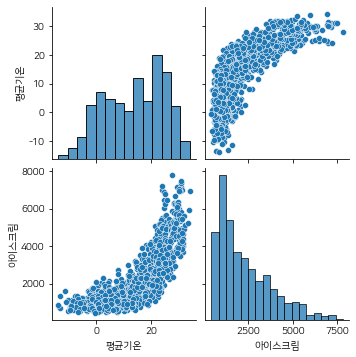

In [ ]:
# scatter
cols = ["평균기온","아이스크림"]
sns.pairplot(df[cols])
plt.show()

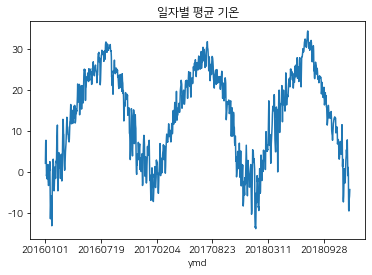

In [ ]:
df['평균기온'].plot(title = '일자별 평균 기온')

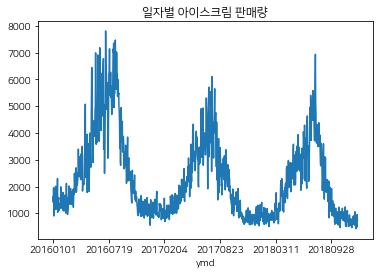

In [ ]:
df['아이스크림'].plot(title = '일자별 아이스크림 판매량')

#회귀분석

In [ ]:
# Python ≥3.5 이상을 권장
import sys
print("Python version: {}".format(sys.version))

# Scikit-Learn ≥0.20 이상을 권장
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scikit-learn version: 1.0.2


## 데이터 전처리
 - 학습/테스트데이터 분할
 - 독립변수 표준화 수행


In [ ]:
exp_df = df
display(exp_df.head(3))
exp_df.describe()  #변수 scale확인
print(exp_df.isnull().sum())  #결측치 확인

,평균기온,습도,평균풍속,강수량,아이스크림
ymd,,,,,
20160101,2.1,73.0,1.2,0.0,1607.0
20160102,7.1,73.0,1.1,0.0,1410.0
20160103,7.7,80.0,0.9,0.0,1952.0


평균기온     0
습도       0
평균풍속     0
강수량      0
아이스크림    0
dtype: int64


In [ ]:
y = exp_df["아이스크림"]
X = exp_df.iloc[:,0:-1]
display(X.head())

,평균기온,습도,평균풍속,강수량
ymd,,,,
20160101,2.1,73.0,1.2,0.0
20160102,7.1,73.0,1.1,0.0
20160103,7.7,80.0,0.9,0.0
20160104,3.4,51.0,2.4,0.0
20160105,-1.0,36.0,1.7,0.0


In [ ]:
# 학습 / 테스트데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# 독립변수 표준화 
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
s_scaler.fit_transform(X_train)
s_scaler.transform(X_test)

array([[ 0.98, -0.54,  0.55, -0.26],
       [ 1.  , -1.52, -1.1 , -0.26],
       [-0.18, -0.21,  1.58, -0.26],
       ...,
       [-1.  , -0.54, -1.3 , -0.26],
       [-1.41, -1.  ,  1.17, -0.26],
       [-0.44, -0.67, -0.27, -0.26]])

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [ ]:
train_performance = lr_model.score(X_train, y_train)
test_performance = lr_model.score(X_test, y_test)
print("아이스크림 판매량 예측결과: \n", y_predict[0:10])
print("훈련 성능: {}   테스트 성능: {}".format(train_performance, test_performance))
print(X_train.columns)

np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한
print("회귀식: {}  절편: {}".format(lr_model.coef_, lr_model.intercept_))

#독립변수가 종속변수의 변동을 66.7% 설명
#그러나, 머신러닝에서는 MAE, RMSE를 더 중요한 성능으로 고려함

아이스크림 판매량 예측결과: 
 [3751.03 3628.8  2369.56 2511.99 3325.19 2064.67 2515.95 3917.9   876.87
  391.73]
훈련 성능: 0.6558744122828921   테스트 성능: 0.6600792569515556
Index(['평균기온', '습도', '평균풍속', '강수량'], dtype='object')
회귀식: [121.42  -5.7  305.28  -9.26]  절편: 469.3067983522035


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#mean_absolute_error(실제, 예측)
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#MAE기준으로 해석하면, 회귀식이 평균적으로 예측한 아이스크림판매량은 실제값과 약 676개 정도 오차가 있음.

MAE: 676.1850217905873
RMSE: 753532.4221682443


## Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly =PolynomialFeatures(degree = 2, include_bias = False)  #2제곱까지, include_bias = False 절편은 포함 안함. 회귀식에서 자동으로 포함하니 불필요
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)

print(train_poly.shape)
print(test_poly.shape)
poly.get_feature_names()

(876, 14)
(219, 14)


['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [ ]:
lr_model2 = LinearRegression()
lr_model2.fit(train_poly, y_train)
y_predict = lr_model2.predict(test_poly)
train_performance2 = lr_model2.score(train_poly, y_train)
test_performance2 = lr_model2.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance2, test_performance2))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

#R2가 향상되었으며, 오차율이 줄어듦
#실제 아이스크림 판매량과 예측 아이스크림 판매량이 평균 438개 정도 차이남

훈련 성능: 0.7750719546504133   테스트 성능: 0.7435990052679762
MAE: 560.1571287510357
RMSE: 581055.2966619744


In [ ]:
# 학습/테스트 : 층화 추출
# 회귀식 변수 선택 *


# 구체적인 모형의 도출
import numpy as np
np.set_printoptions(suppress=True, precision =2) #넘파이 결과가 지수형태로 나와서 보기 안좋아서 지수 제한

print("회귀계수: {}  절편:{}".format(lr_model2.coef_, lr_model2.intercept_))

##회귀분석 - sklearn 이용 - Ridge & Lasso 회귀분석

In [ ]:
from sklearn.linear_model import Ridge  #Lasso는 Ridge를 Lasso로만 변경

Ridge = Ridge(alpha = 0.3)
Ridge.fit(train_poly, y_train)
y_predict = Ridge.predict(test_poly)
train_performance3 = Ridge.score(train_poly, y_train)
test_performance3 = Ridge.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance3, test_performance3))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

print("회귀계수: {}  절편:{}".format(Ridge.coef_, Ridge.intercept_))

# 학습/테스트 데이터 변동 없음
#MAE도 동일

훈련 성능: 0.7750719185823562   테스트 성능: 0.7435907862878989
MAE: 560.1395430563828
RMSE: 581073.922494187
회귀계수: [ -17.6   -25.41   41.71   39.8     5.47   -0.66   20.91   -0.3     0.16
    7.84   -0.39 -123.05   -9.57    0.11]  절편:1440.0626668037792


In [ ]:
from sklearn.linear_model import Lasso  #Lasso는 Ridge를 Lasso로만 변경

Lasso = Lasso(alpha = 0.3)
Lasso.fit(train_poly, y_train)
y_predict = Lasso.predict(test_poly)
train_performance3 = Lasso.score(train_poly, y_train)
test_performance3 = Lasso.score(test_poly, y_test)
print("훈련 성능: {}   테스트 성능: {}".format(train_performance3, test_performance3))
print("MAE:", mean_absolute_error(y_test, y_predict ))
print("RMSE:", mean_squared_error(y_test, y_predict))

print("회귀계수: {}  절편:{}".format(Lasso.coef_, Lasso.intercept_))

# 학습/테스트 데이터 변동 없음
#MAE도 동일

훈련 성능: 0.7750666572775925   테스트 성능: 0.7435143429687909
MAE: 559.9431487116461
RMSE: 581247.1581538557
회귀계수: [ -17.66  -25.42    0.     38.92    5.48   -0.66   20.92   -0.3     0.16
    8.09   -0.38 -115.76   -9.63    0.11]  절편:1476.5376959322402
